Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [78]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#password = getpass.getpass()

In [2]:
#1. Load the dataset and explore the variables.
data = pd.read_csv('../files_for_lab/customer_churn.csv')

In [56]:
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.shape

(7043, 21)

In [58]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [60]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Class imbalance detected!

In [62]:
standard_columns = [df.columns[i].lower() for i in range(len(df.columns))]
df.columns = standard_columns

In [63]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [64]:
df.set_index('customerid')

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [65]:
for col in df.select_dtypes(np.number):
    print(df[col].value_counts(), '\n')

0    5901
1    1142
Name: seniorcitizen, dtype: int64 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: monthlycharges, Length: 1585, dtype: int64 



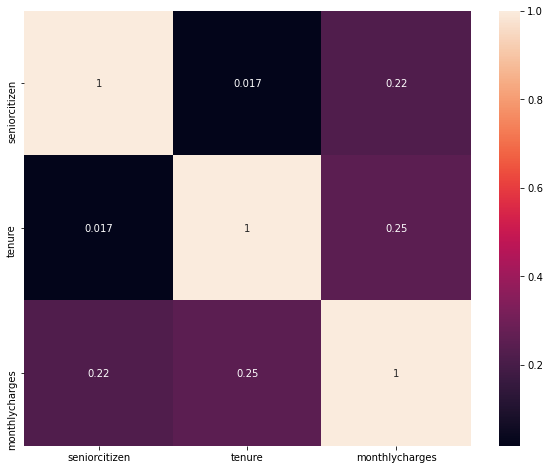

In [66]:
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [54]:
#df2 = data.copy()

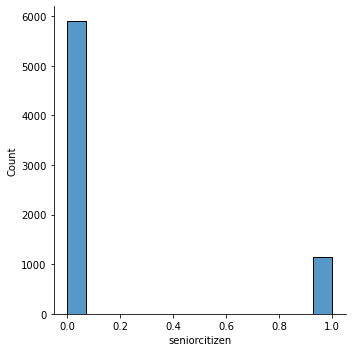

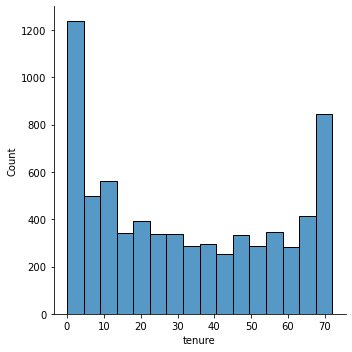

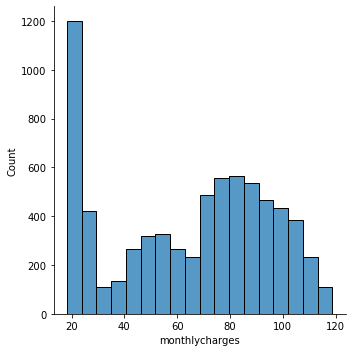

In [67]:
for col in df.select_dtypes(np.number):
    sns.displot(df[col])
    plt.show()

In [68]:
#3. Extract the target variable.
df[['churn']]

,churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [69]:
#4. Extract the independent variables and scale them.
independent_vrb = df.select_dtypes(np.number)
independent_vrb

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


Using log transform for the scaling

In [70]:
log_transform = lambda x: np.log(x) if np.isfinite(x) and x!=0 else np.NAN

In [71]:
def log_scaled(df):
    numeric_cols = df.select_dtypes(np.number).columns
    for column in numeric_cols:
        df[column] = df[column].apply(log_transform).fillna(df[column].mean()) 
    return df

In [72]:
scaled_independent_vrb = log_scaled(independent_vrb)
scaled_independent_vrb

<ipython-input-71-63636466fd12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(log_transform).fillna(df[column].mean())


,seniorcitizen,tenure,monthlycharges
0,0.162147,0.000000,3.396185
1,0.162147,3.526361,4.042174
2,0.162147,0.693147,3.986202
3,0.162147,3.806662,3.744787
4,0.162147,0.693147,4.258446
...,...,...,...
7038,0.162147,3.178054,4.440296
7039,0.162147,4.276666,4.636669
7040,0.162147,2.397895,3.387774
7041,0.000000,1.386294,4.309456


In [74]:
#5. Build the logistic regression model.
# X - y split
X = scaled_independent_vrb
y = df[['churn']]

In [76]:
# Train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

C:\Users\49178\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=10000, random_state=42)

In [79]:
classification.score(X_test, y_test)

0.7885024840312278

In [28]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[931, 105],
       [155, 218]], dtype=int64)

7. Even a simple model will give us more than 70% accuracy. Why?

ANS: This is because of the data imbalance.

In [29]:
# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
# Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. 
# Is it there any improvement?

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

churn
No       5174
Yes      5174
dtype: int64

In [85]:
# Train - test split
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [97]:
# Train the model
classification2 = LogisticRegression(random_state=42, max_iter=10000)
classification2.fit(X_sm_train, y_sm_train)

LogisticRegression(max_iter=10000, random_state=42)

In [98]:
classification2.score(X_sm_test, y_sm_test)

0.7381642512077294

In [99]:
preds = classification2.predict(X_sm_test)
confusion_matrix(y_sm_test, preds)

array([[783, 238],
       [304, 745]], dtype=int64)

We see some improvement as the True Positive reduce and True Negative increased significantly. Although the False Positive and False Negatives increased by over a 100%.

In [ ]:
# Tomek links are pairs of very close instances, but of opposite classes. 
# Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
# Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. 
# Is it there any improvement?

In [91]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

churn
No       4700
Yes      1869
dtype: int64

In [103]:
# Train - test split
X_tl_train, X_tl_test, y_tl_train, y_tl_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [104]:
# Train the model
classification3 = LogisticRegression(random_state=42, max_iter=10000)
classification3.fit(X_tl_train, y_tl_train)

LogisticRegression(max_iter=10000, random_state=42)

In [105]:
classification3.score(X_tl_test, y_tl_test)

0.791476407914764

In [106]:
prediction = classification3.predict(X_tl_test)
confusion_matrix(y_tl_test, prediction)

array([[859,  77],
       [197, 181]], dtype=int64)

This looks like an improvement as number of True Positives increase and False Negatives reduced, although the True Negatives also increase.